In [1]:
import jieba
import jieba.analyse
import jieba.posseg as pseg
import re
from pyltp import NamedEntityRecognizer

# 创建停用词list
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords
# 对句子进行分词
def seg_sentence(sentence):
    sentence_seged = jieba.cut(sentence.strip())
    stopwords = stopwordslist('./data/stopwords.txt')  # 这里加载停用词的路径
    outstr = ''
    for word in sentence_seged:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr
inputs = open('./data/20report.txt', 'r', encoding='utf-8')
outputs = open('./data/20report_fenci.txt', 'w', encoding='utf-8')
for line in inputs:
    line_seg = seg_sentence(line)  # 这里的返回值是字符串
    outputs.write(line_seg + '\n')
outputs.close()
inputs.close()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\12973\AppData\Local\Temp\jieba.cache
Loading model cost 0.602 seconds.
Prefix dict has been built successfully.


In [2]:
import jieba
from gensim.models import word2vec

# 加载语料
sentences = word2vec.Text8Corpus('data/20report_fenci.txt')
# 训练模型
model = word2vec.Word2Vec(sentences,min_count=5)
# 模型里面有一个min_count属性值，默认值是5，会忽略频次少于5的词，发生这个错是因为词表里所有词的频率都少于5，把这个值改小一点就可以了
#
# 选出最相似的10个词
for e in model.wv.most_similar(positive=['人民'], topn=10):
    print(e[0], e[1])
# 保存模型
model.save('data/ershida.model')
# 加载模型
model = word2vec.Word2Vec.load('data/ershida.model')

发展 0.9658187627792358
社会主义 0.9640661478042603
坚持 0.963741660118103
中国 0.9610973596572876
建设 0.9605240821838379
新 0.9585800170898438
体系 0.9560775756835938
政治 0.9525172710418701
全面 0.9518018364906311
党 0.9513825178146362


In [3]:
# 计算两个词的相似度

print("计算两个词的相似度:{}".format(model.wv.similarity('奋斗', '社会主义')))

计算两个词的相似度:0.8935384154319763


In [4]:
# 计算两个集合的相似度
list1 = ['奋斗', "社会主义"]
list2 = ['奋斗', "人民"]
print("计算两个集合的相似度:{}".format(model.wv.n_similarity(list1, list2)))

计算两个集合的相似度:0.982224702835083


In [5]:
# 选出集合不同类的词语
list3 = ['奋斗', "社会主义", '人民', "伟大"]
print("选出集合不同类的词语:{}".format(model.wv.doesnt_match(list3)))

选出集合不同类的词语:奋斗


In [6]:
# 查看词的词向量
# model后面加上，model.wv即可
print(type(model.wv['奋斗']))
print(len(model.wv['奋斗']))
print((model.wv['奋斗']))

<class 'numpy.ndarray'>
100
[-0.00600212  0.00360648 -0.00208823 -0.00625219  0.00590871 -0.01463246
 -0.00225059  0.03727823 -0.00702878 -0.00669927 -0.00724097 -0.02481219
 -0.00375137  0.01257884  0.00575714 -0.00995446 -0.00141846 -0.02701546
 -0.01353288 -0.03703799 -0.00292071 -0.00373301 -0.00054872 -0.00601695
  0.00225212  0.00035813 -0.00617503 -0.01954522 -0.01278667  0.00166149
  0.01382458  0.00477606  0.00995564 -0.01430982 -0.01665816  0.01553748
  0.00905815 -0.01481368  0.00136287 -0.02600189  0.00077627 -0.02642352
 -0.0077672  -0.00111311  0.01212511 -0.00372408 -0.00485475  0.00022692
  0.01196304  0.01764252  0.00454724 -0.01309528 -0.00121586 -0.00494303
  0.00122133  0.01812705 -0.00212191 -0.00283446 -0.00966192  0.0083139
  0.00894012 -0.00459906 -0.00245952  0.00232317 -0.00904539  0.0195395
  0.00873267  0.01203832 -0.01369364  0.01419722 -0.01756507  0.01558218
  0.00443179 -0.01168961  0.01586351  0.0122526   0.00869317  0.00140189
 -0.01206815  0.01036377 

In [7]:
import wordcloud
from imageio import imread
mask=imread('data/1.jpg')

f=open('data/20report_fenci.txt','r',encoding='utf-8')
txt=f.read()

w=wordcloud.WordCloud(width=1000,height=700,background_color='white',mask=mask,font_path='E:\\字体\\办公常用字体\\仿宋_GB2312.ttf')
w.generate(txt)
w.to_file('wordclond.png')

C:\Users\12973\AppData\Local\Temp\ipykernel_11340\1493589074.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask=imread('data/1.jpg')
D:\Anaconda3\envs\visualization\lib\site-packages\PIL\TiffImagePlugin.py:850: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [9]:
#第一步 生成词频矩阵
corpus = []
for line in open('./data/20report_fenci.txt', 'r', encoding="utf-8").readlines():
    corpus.append(line.strip())
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names()
for n in range(len(word)):
    print(word[n],end=" ")
print('')
print(X.toarray())

一个 一体 一体化 一刻 一千元 一国两制 一场 一定 一带 一批 一新 一是 一次 一流 一百一十 一百周年 一百四十多个 一百年 一系列 一路 一道 一项 七十 七点 三万九千 三个代表 三五年 三件 三是 上同 上规模 不信邪 不可逆转 不合理 不少 不忘 不怠 不想 不懈努力 不敢 不断 不断丰富 不能 不负 不足 专业化 专项斗争 世界 世界观 世纪 两岸 两岸关系 两步走 严峻 严格 严格执法 严重 个人信息 中共中央 中医药 中华 中华人民共和国 中华儿女 中华文化 中华文明 中华民族 中叶 中国 中国共产党 中国化 中国史 中国式 中央 中央委员会 中心 中来 中等 丰富 为主 为先 为国 为本 为民造福 主义 主体 主动 主动性 主动权 主导权 主流 主要 主要矛盾 主题 举世瞩目 举国体制 举措 义利观 义无反顾 之义 之变 之花 之路 之间 乘风破浪 九千 乡村 事业 事件 事关 事务 事情 二个 二十一 二是 互利 五位一体 五十四万 五年 五湖四海 五项原则 亟待解决 交流 交通 产业 产业链 产品 产生 享有 亲诚 人与自然 人人 人人有责 人口 人口老龄化 人员 人均 人居 人才 人才培养 人权 人来 人民 人民代表大会 人民军队 人民团体 人民意志 人民战争 人民政协 人民满意 人类 人类文明 亿万人民 亿亩 亿元 今后 从严治党 从现在起 代表 以下 以严 以党 以德 以新 价值 价值观 任人唯贤 任务 任重道远 休养生息 休耕 优先 优先发展 优势 优势互补 优化 优秀 优秀人才 优秀作品 伙伴 伙伴关系 伟业 伟力 伟大 伟大事业 伟大工程 伟大成就 伟大旗帜 传承 传播 传染性 传统 传统美德 位置 低收入者 低碳 住房 体制 体系 体育 何去何从 作出 作善成 作战 作用 使命 使命感 使尊 使用 供应链 供给 依托 依法 依法治国 依法行政 依规 依靠 依靠人民 侨务工作 侨胞 侵害 促进 保卫战 保护 保护主义 保持 保留 保证 保障 信仰 信仰者 信心百倍 信念 信息 修复 倍加 倡导 倡议 做到 做好 健全 健康 充分 充分体现 充分发挥 充分肯定 充实 先立 先进 先进性 先锋 光明 党中央 党史 党员 党员队伍 党和人民 党和国家 党执政 党永葆 党用 党的基本 党的建设 党的领导 党组织 兜底 全人类 全党 全

D:\Anaconda3\envs\visualization\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
#第二步 计算TF-IDF值
transformer = TfidfTransformer()
print(transformer)
tfidf = transformer.fit_transform(X)
print(tfidf.toarray())
weight = tfidf.toarray()

TfidfTransformer()
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
#第三步 KMeans聚类
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
s = clf.fit(weight)
y_pred = clf.fit_predict(weight)
print(clf)
print(clf.cluster_centers_) #类簇中心
print(clf.inertia_)         #距离:用来评估簇的个数是否合适 越小说明簇分的越好
print(y_pred)               #预测类标

KMeans(n_clusters=3)
[[-3.25260652e-19  6.50521303e-19  0.00000000e+00 ...  1.08420217e-19
  -2.16840434e-19  8.67361738e-19]
 [-5.42101086e-19  6.50521303e-19  2.60208521e-18 ...  2.16840434e-19
  -4.33680869e-19 -8.67361738e-19]
 [ 1.55882781e-03  3.10214849e-03  7.44983011e-03 ...  1.03346083e-03
   1.33236640e-03  4.45637816e-03]]
88.10032165580981
[1 1 1 1 0 1 2 1 2 1 0 2 2 2 1 2 0 0 2 2 2 2 2 2 0 2 2 2 2 1 2 1 0 1 2 1 0
 0 0 0 0 1 0 1 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 0 0 0 2 1
 2 2 2 2 1 2 2 2 2 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 2 2 2 1 2 2 2 1 1 1 2 2
 2 2 0 1 1]


In [12]:
#第四步 降维处理
from sklearn.decomposition import PCA
pca = PCA(n_components=2)   #降低成两维绘图
newData = pca.fit_transform(weight)
print(newData)
x = [n[0] for n in newData]
y = [n[1] for n in newData]

[[-0.0918896  -0.15165287]
 [-0.06867422 -0.06443989]
 [-0.10329031 -0.12687072]
 [-0.06867422 -0.06443989]
 [-0.02335697 -0.18227681]
 [-0.06867422 -0.06443989]
 [ 0.16361871 -0.19009725]
 [-0.06867422 -0.06443989]
 [ 0.01330411 -0.18398582]
 [-0.06867422 -0.06443989]
 [-0.07537612 -0.20873188]
 [ 0.02677454 -0.17011155]
 [ 0.04404934  0.16130754]
 [ 0.05338191 -0.19346457]
 [-0.00353328 -0.13115422]
 [ 0.01741634 -0.11988434]
 [ 0.14528104 -0.16798613]
 [-0.05634605 -0.07778079]
 [-0.06463553 -0.14069343]
 [ 0.0104015   0.02244153]
 [-0.0621575   0.07176691]
 [-0.04009993  0.00759544]
 [-0.10841342  0.02764496]
 [ 0.46666073  0.21415893]
 [ 0.05015377 -0.09695142]
 [ 0.00886722  0.05781516]
 [-0.09620973  0.00233928]
 [-0.2527506   0.22948082]
 [-0.12972754 -0.09748116]
 [-0.0967528  -0.03266869]
 [-0.08063256  0.14358634]
 [-0.07519875 -0.12361521]
 [-0.0877335  -0.12894883]
 [-0.05384348 -0.15706378]
 [ 0.22594381 -0.11362321]
 [-0.06867422 -0.06443989]
 [-0.06281828 -0.19229845]
 

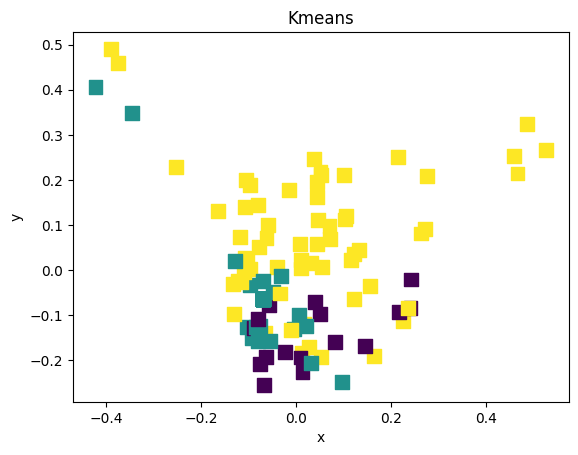

In [13]:
#第五步 可视化
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x, y, c=y_pred, s=100, marker='s')
plt.title("Kmeans")
plt.xlabel("x")
plt.ylabel("y")
plt.show()